In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

import matplotlib

from mpl_toolkits.axes_grid1 import make_axes_locatable

import matplotlib.patches as mpatches

In [3]:
import matplotlib.gridspec as gridspec

import matplotlib.colors as colors

In [4]:
import numpy as np

In [5]:
# plt.rcParams["font.weight"] = "bold"
# plt.rcParams["axes.labelweight"] = "bold"
plt.rcParams["font.size"] = 12

plt.rcParams["font.family"] = "Arial"

In [6]:
import glob

In [7]:
from tqdm.notebook import tqdm

In [8]:
def frequencies(df, max_steps=10**7):
    frequencies = []
    previous = 0
    for value in df["t"][1:]:
        frequencies.append(value - previous)
        previous = value
    frequencies.append(max_steps - previous)

    df["frequencies"] = np.array(frequencies)
    df["frequencies norm"] = np.array(frequencies) / max_steps

    return df

In [9]:
reactone_col = ["p1", "p2", "t", "coop."]

reacttwo_col = ["p1", "p2", "p3", "p4", "t", "coop."]

reactthree_col = ["p1", "p2", "p3", "p4", "p5", "p6", "p7", "p8", "t", "coop."]

### Values

In [10]:
powers = [-5 , -4.5,   -4,   -3.5,   -3,   -2.5, -2,   -1.5,   -1]

In [11]:
['$10^{-5.0}$',
 '$10^{-4.5}$',
 '$10^{-4.0}$',
 '$10^{-3.5}$',
 '$10^{-3.0}$',
 '$10^{-2.5}$',
 '$10^{-2.0}$',
 '$10^{-1.5}$',
 '$10^{-1.0}$']

['$10^{-5.0}$',
 '$10^{-4.5}$',
 '$10^{-4.0}$',
 '$10^{-3.5}$',
 '$10^{-3.0}$',
 '$10^{-2.5}$',
 '$10^{-2.0}$',
 '$10^{-1.5}$',
 '$10^{-1.0}$']

### Heat Maps

In [12]:
files = glob.glob("../src/evolution_simulations/ErrorGrid/dimension_2_error_*.csv")

In [13]:
files.sort()

In [14]:
data1 = []

for file in tqdm(files):
    error = float(file.split("error_")[-1].split("_cost")[0])
    cost = float(file.split("cost_")[-1].split(".csv")[0])
    df = pd.read_csv(file, names=reactone_col)
    df = df.drop_duplicates()
    df = frequencies(df, 10 ** 7)
    
    coop = sum(df['coop.'] * df['frequencies norm'])
    
    data1.append((error, cost, coop))

  0%|          | 0/90 [00:00<?, ?it/s]

In [20]:
len(data1)

90

In [21]:
df3 = pd.DataFrame(data1, columns=['error', 'cost', 'coop'])

In [22]:
df3 = df3.sort_values(["error", "cost"])

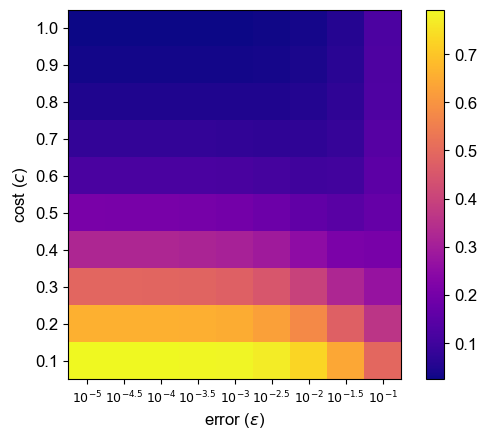

In [23]:
plt.imshow(df3['coop'].values.reshape((9, 10)).T, origin="lower", cmap='plasma');

plt.yticks(range(10), df3['cost'].unique())

plt.xticks(range(9), ['$10^{-5}$',
 '$10^{-4.5}$',
 '$10^{-4}$',
 '$10^{-3.5}$',
 '$10^{-3}$',
 '$10^{-2.5}$',
 '$10^{-2}$',
 '$10^{-1.5}$',
 '$10^{-1}$'], fontsize=9)

plt.xlabel("error ($\epsilon$)")

plt.ylabel("cost ($c$)")

plt.colorbar();

In [24]:
files = glob.glob("../src/evolution_simulations/ErrorGrid/dimension_4_error_*.csv")

In [25]:
files.sort()

In [26]:
data = []

for file in tqdm(files):
    error = float(file.split("error_")[-1].split("_cost")[0])
    cost = float(file.split("cost_")[-1].split(".csv")[0])
    df = pd.read_csv(file, names=reacttwo_col)
    df = df.drop_duplicates()
    df = frequencies(df, 10 ** 7)
    
    coop = sum(df['coop.'] * df['frequencies norm'])
    
    data.append((error, cost, coop))

  0%|          | 0/90 [00:00<?, ?it/s]

In [27]:
df1 = pd.DataFrame(data, columns=['error', 'cost', 'coop'])

In [28]:
df1 = df1.sort_values(["error", "cost"])

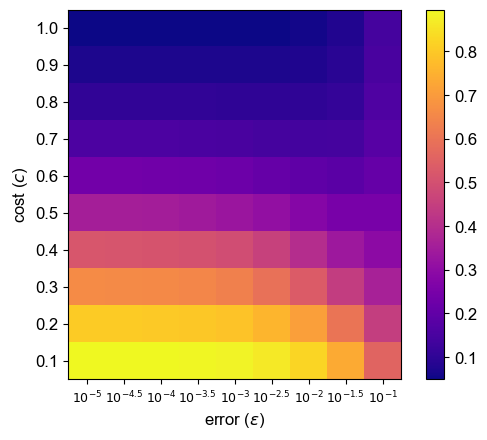

In [29]:
plt.imshow(df1['coop'].values.reshape((9, 10)).T, origin="lower", cmap='plasma');

plt.yticks(range(10), df1['cost'].unique())

plt.xticks(range(9), ['$10^{-5}$',
 '$10^{-4.5}$',
 '$10^{-4}$',
 '$10^{-3.5}$',
 '$10^{-3}$',
 '$10^{-2.5}$',
 '$10^{-2}$',
 '$10^{-1.5}$',
 '$10^{-1}$'], fontsize=9)

plt.xlabel("error ($\epsilon$)")

plt.ylabel("cost ($c$)")

plt.colorbar();

In [30]:
files = glob.glob("../src/evolution_simulations/ErrorGrid/dimension_8_error_*.csv")

In [31]:
files.sort()

In [32]:
data3 = []

for file in tqdm(files):
    error = float(file.split("error_")[-1].split("_cost")[0])
    cost = float(file.split("cost_")[-1].split(".csv")[0])
    df = pd.read_csv(file, names=reactthree_col)
    df = df.drop_duplicates()
    df = frequencies(df, 10 ** 7)
    
    coop = sum(df['coop.'] * df['frequencies norm'])
    
    data3.append((error, cost, coop))

  0%|          | 0/90 [00:00<?, ?it/s]

In [33]:
df2 = pd.DataFrame(data3, columns=['error', 'cost', 'coop'])

In [34]:
df2 = df2.sort_values(["error", "cost"])

In [35]:
vmin = 0
vmax = 1
norm = colors.TwoSlopeNorm(vmin=vmin, vcenter=0.5, vmax=vmax)

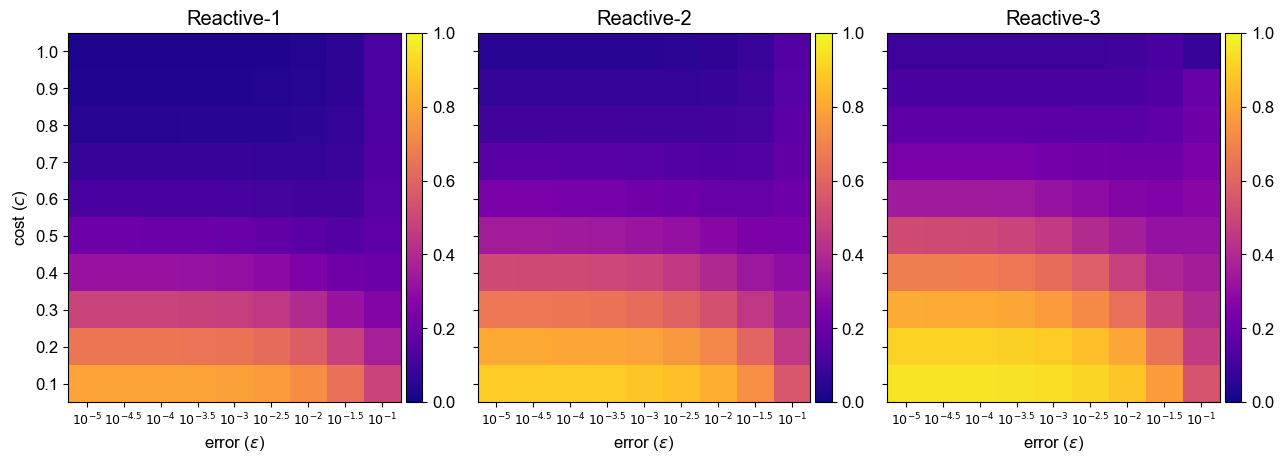

In [37]:
fig, axes = plt.subplots(ncols=3, figsize=(13, 5), sharex=True, sharey=True)

for i, df in enumerate([df3, df1, df2]):

    im = axes[i].imshow(df['coop'].values.reshape((9, 10)).T,
                         origin="lower",
                         cmap='plasma',
                         vmax=1,
                         vmin=0);

    axes[i].set_yticks(range(10), df['cost'].unique())

    axes[i].set_xticks(range(9), ['$10^{-5}$',
     '$10^{-4.5}$',
     '$10^{-4}$',
     '$10^{-3.5}$',
     '$10^{-3}$',
     '$10^{-2.5}$',
     '$10^{-2}$',
     '$10^{-1.5}$',
     '$10^{-1}$'], fontsize=9)
    
    axes[i].set_xlabel("error ($\epsilon$)")

    divider = make_axes_locatable(axes[i])

    cax = divider.append_axes('right', size='5%', pad=0.05)

    fig.colorbar(im, cax=cax, orientation='vertical');



axes[0].set_ylabel("cost ($c$)")

axes[0].set_title("Reactive-1")

axes[1].set_title("Reactive-2")

axes[2].set_title("Reactive-3")

fig.tight_layout();

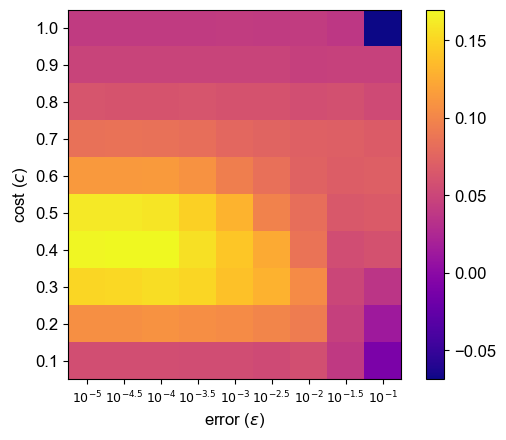

In [38]:
plt.imshow(df2['coop'].values.reshape((9, 10)).T - df1['coop'].values.reshape((9, 10)).T,
           origin="lower", cmap='plasma');

plt.yticks(range(10), df1['cost'].unique())

plt.xticks(range(9), ['$10^{-5}$',
 '$10^{-4.5}$',
 '$10^{-4}$',
 '$10^{-3.5}$',
 '$10^{-3}$',
 '$10^{-2.5}$',
 '$10^{-2}$',
 '$10^{-1.5}$',
 '$10^{-1}$'], fontsize=9)

plt.xlabel("error ($\epsilon$)")

plt.ylabel("cost ($c$)")

plt.colorbar();

In [ ]:
noerrors = []


for file, columns, run in zip(files, [reactone_col, reacttwo_col, reactthree_col], runs):
    df = pd.read_csv(file, names=columns)
    df = df.drop_duplicates()
    df = frequencies(df, run)
    
    noerrors.append(df)

In [20]:
pd.read_csv('../src/evolution_simulations/ErrorGrid/dimension_4_error_0.0001_cost_0.1.csv')

,0,0.1,0.2,0.3,0.4,0.5
0,0.187570,0.889442,0.583406,0.309246,248,0.498197
1,0.377240,0.663603,0.086333,0.549890,466,0.428121
2,0.503378,0.527160,0.288080,0.511999,520,0.457661
3,0.890724,0.858715,0.184257,0.236809,565,0.627072
4,0.882602,0.631594,0.963663,0.599714,646,0.855999
...,...,...,...,...,...,...
99994,0.000000,0.000000,0.000000,0.000000,0,0.000000
99995,0.000000,0.000000,0.000000,0.000000,0,0.000000
99996,0.000000,0.000000,0.000000,0.000000,0,0.000000
99997,0.000000,0.000000,0.000000,0.000000,0,0.000000


### No Errors

In [96]:
files = ['../src/evolution_simulations/reactive_one_no_error.csv',
         '../src/evolution_simulations/reactive_two_no_error.csv',
         '../data/matlab_data/bits_8_beta_1_seed_1_c_0.3.csv']

In [97]:
noerrors = []

runs = [10 ** 7, 10 ** 7, 2 * 10 ** 7]

for file, columns, run in zip(files, [reactone_col, reacttwo_col, reactthree_col], runs):
    df = pd.read_csv(file, names=columns)
    df = df.drop_duplicates()
    df = frequencies(df, run)
    
    noerrors.append(df)

In [98]:
noerror_coops = [sum(df['coop.'] * df['frequencies norm']) for df in noerrors]

In [99]:
noerror_coops 

[0.48235467699928053, 0.6661317443516404, 0.8312889514831286]

### With Errors

In [66]:
files = glob.glob("../src/evolution_simulations/ErrorSim/reactive_one_*.csv")

In [67]:
reactive_one_errors = []
errors = [0]

for file in tqdm(files):
    error = float(file.split("_")[-1].split(".csv")[0])
    errors.append(error)

    df = pd.read_csv(file, names=reactone_col)

    df = df.drop_duplicates()

    df["error"] = error


    df = frequencies(df, 10**7)

    reactive_one_errors.append(df)

  0%|          | 0/7 [00:00<?, ?it/s]

In [68]:
reactive_one_errors = pd.concat(reactive_one_errors)
reactive_one_errors = reactive_one_errors.sort_values("error")

#### Two

In [69]:
files = glob.glob("../src/evolution_simulations/ErrorSim/reactive_two_*.csv")

In [70]:
reactive_two_errors = []
errors = [0]

for file in tqdm(files):
    error = float(file.split("_")[-1].split(".csv")[0])
    errors.append(error)

    df = pd.read_csv(file, names=reacttwo_col)

    df = df.drop_duplicates()

    df["error"] = error


    df = frequencies(df, 10**7)

    reactive_two_errors.append(df)

  0%|          | 0/7 [00:00<?, ?it/s]

In [71]:
reactive_two_errors = pd.concat(reactive_two_errors)
reactive_two_errors = reactive_two_errors.sort_values("error")

In [72]:
files = glob.glob("../src/evolution_simulations/ErrorSim 2/reactive_three_*.csv")

In [73]:
reactive_three_errors = []
errors_three = []

for file in tqdm(files):
    error = float(file.split("_")[-1].split(".csv")[0])
    errors_three.append(error)

    df = pd.read_csv(file, names=reactthree_col)

    df = df.drop_duplicates()

    df["error"] = error


    df = frequencies(df, 10**7)

    reactive_three_errors.append(df)

  0%|          | 0/7 [00:00<?, ?it/s]

In [74]:
reactive_three_errors = pd.concat(reactive_three_errors)
reactive_three_errors = reactive_three_errors.sort_values("error")

In [100]:
errors = []
points = []

for i, df in enumerate([reactive_one_errors, reactive_two_errors, reactive_three_errors]):
    groups = df.groupby("error")
    
    error_points = [0]
    coop_points = [noerror_coops[i]]
    
    for j, group in groups:
        error_points.append(j)
        coop = sum(group['coop.'] * group['frequencies norm'])
        coop_points.append(coop)
    error_points.sort()


    errors.append(error_points)
    points.append(coop_points)

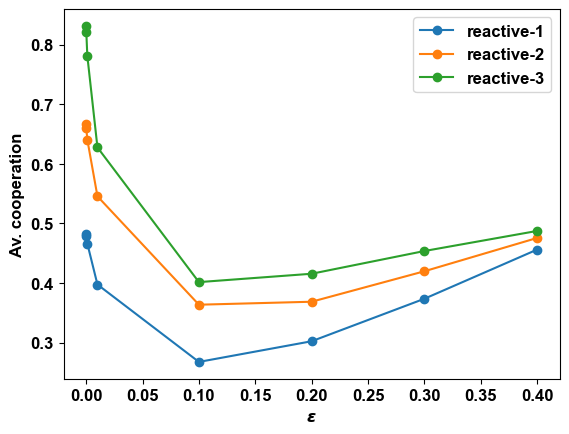

In [105]:
labels = ['reactive-1', 'reactive-2', 'reactive-3']

for error, coops, label in zip(errors, points, labels):

    plt.plot(error, coops, '-o', label=label);
    
    
plt.legend();
plt.ylabel("Av. cooperation");
plt.xlabel("$\epsilon$");